# Evolution Project Phase-3 (Census income)

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [2]:
#  importing our dataset
df=pd.read_csv('Cencus.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13134,18,?,137363,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
13135,27,Self-emp-not-inc,243569,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
13136,24,Private,119156,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
13137,30,Private,391114,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,60,United-States,<=50K


# Performing EDA

In [3]:
df.shape

(13139, 15)

In [4]:
df.head(7)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [5]:
df.tail(6)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
13133,44,Private,133853,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,<=50K
13134,18,?,137363,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
13135,27,Self-emp-not-inc,243569,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
13136,24,Private,119156,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
13137,30,Private,391114,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,60,United-States,<=50K
13138,27,Private,252506,Some-college,10,Divorced,Exec-managerial,Own-child,White,Female,0,0,40,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13139 entries, 0 to 13138
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             13139 non-null  int64 
 1   workclass       13139 non-null  object
 2   fnlwgt          13139 non-null  int64 
 3   education       13139 non-null  object
 4   education.num   13139 non-null  int64 
 5   marital.status  13139 non-null  object
 6   occupation      13139 non-null  object
 7   relationship    13139 non-null  object
 8   race            13139 non-null  object
 9   sex             13139 non-null  object
 10  capital.gain    13139 non-null  int64 
 11  capital.loss    13139 non-null  int64 
 12  hours.per.week  13139 non-null  int64 
 13  native.country  13139 non-null  object
 14  income          13139 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.5+ MB


In [7]:
# checking for datatypes
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [8]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,13139.000000,1.313900e+04,13139.000000,13139.000000,13139.000000,13139.000000
mean,39.529340,1.898782e+05,10.287769,2670.623640,216.355887,41.142020
std,13.636517,1.052627e+05,2.602751,11441.966947,611.961303,12.321834
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000
25%,29.000000,1.184680e+05,9.000000,0.000000,0.000000,40.000000
50%,38.000000,1.779160e+05,10.000000,0.000000,0.000000,40.000000
75%,49.000000,2.382960e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.226583e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# checking for null/np/na
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

<Axes: >

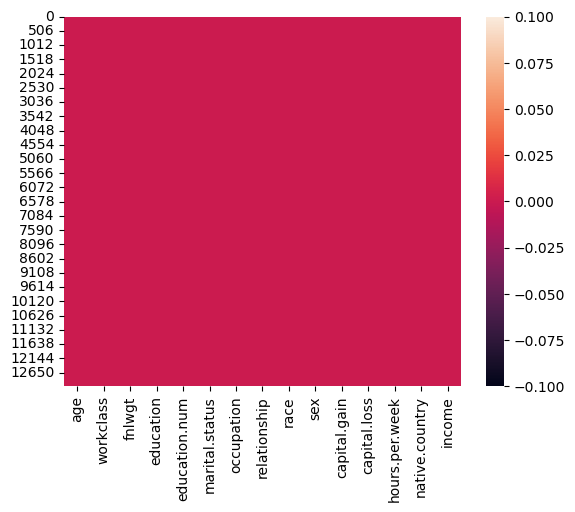

In [10]:
#Checking with heatmap
sns.heatmap(df.isnull())

In [11]:
#checking for correlation
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.070412,0.049952,0.108065,0.069737,0.054615
fnlwgt,-0.070412,1.000000,-0.044171,0.000471,-0.017111,-0.011139
education.num,0.049952,-0.044171,1.000000,0.175328,0.100789,0.160422
capital.gain,0.108065,0.000471,0.175328,1.000000,-0.082526,0.112339
capital.loss,0.069737,-0.017111,0.100789,-0.082526,1.000000,0.068508
hours.per.week,0.054615,-0.011139,0.160422,0.112339,0.068508,1.000000


In [12]:
# seperating numarical and catagorical columns

Cat_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        Cat_columns.append(i)
print('Catagorical_columns :',Cat_columns)

Num_columns=[]
for j in df.dtypes.index:
    if df.dtypes[j]!='object':
        Num_columns.append(j)
print('Numarical_columns :',Num_columns)

Catagorical_columns : ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
Numarical_columns : ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


# Graphical Analysis

Univariate analysis

Male      9084
Female    4055
Name: sex, dtype: int64


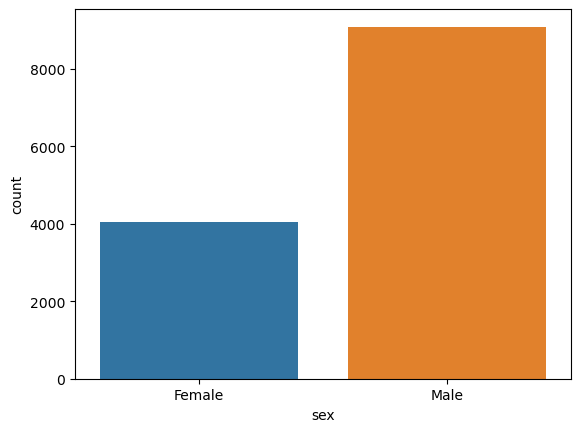

In [13]:
sns.countplot(data=df,x='sex')
print(df['sex'].value_counts())

observation- Male candidates are cimparitavily more than female

Married-civ-spouse       6574
Never-married            3903
Divorced                 1724
Separated                 392
Widowed                   380
Married-spouse-absent     157
Married-AF-spouse           9
Name: marital.status, dtype: int64


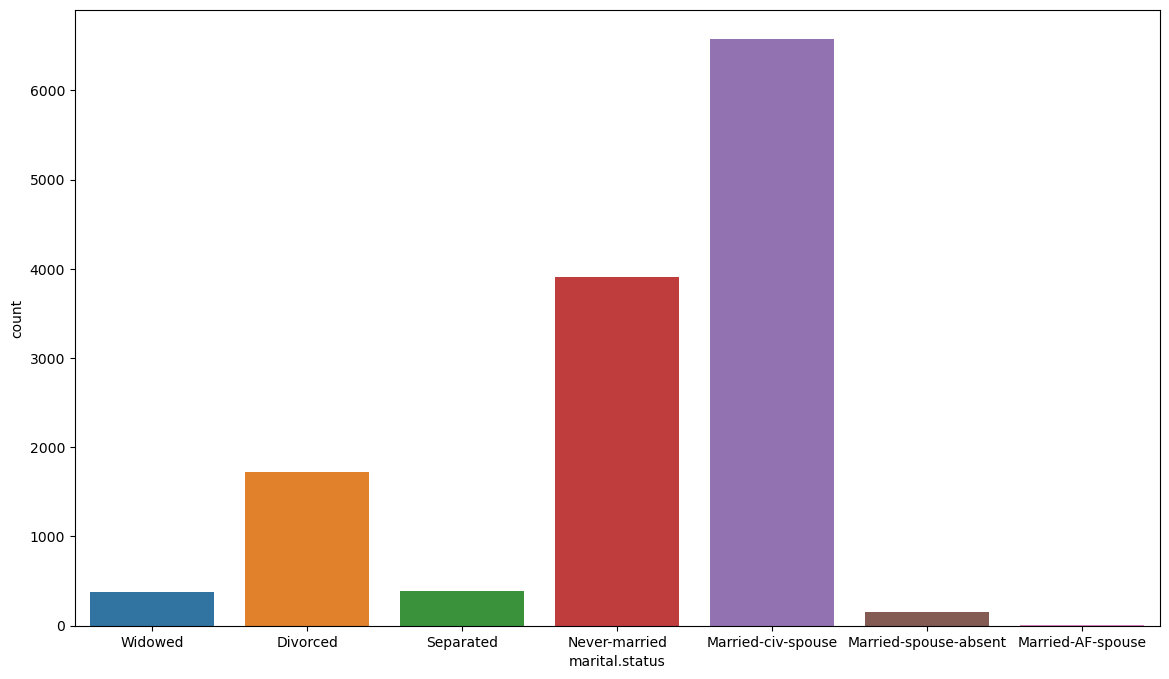

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
sns.countplot(data=df,x='marital.status')
print(df['marital.status'].value_counts())
plt.show()

here we can see never married and married spouse are higher in stats

White                 11324
Black                  1180
Asian-Pac-Islander      411
Amer-Indian-Eskimo      124
Other                   100
Name: race, dtype: int64


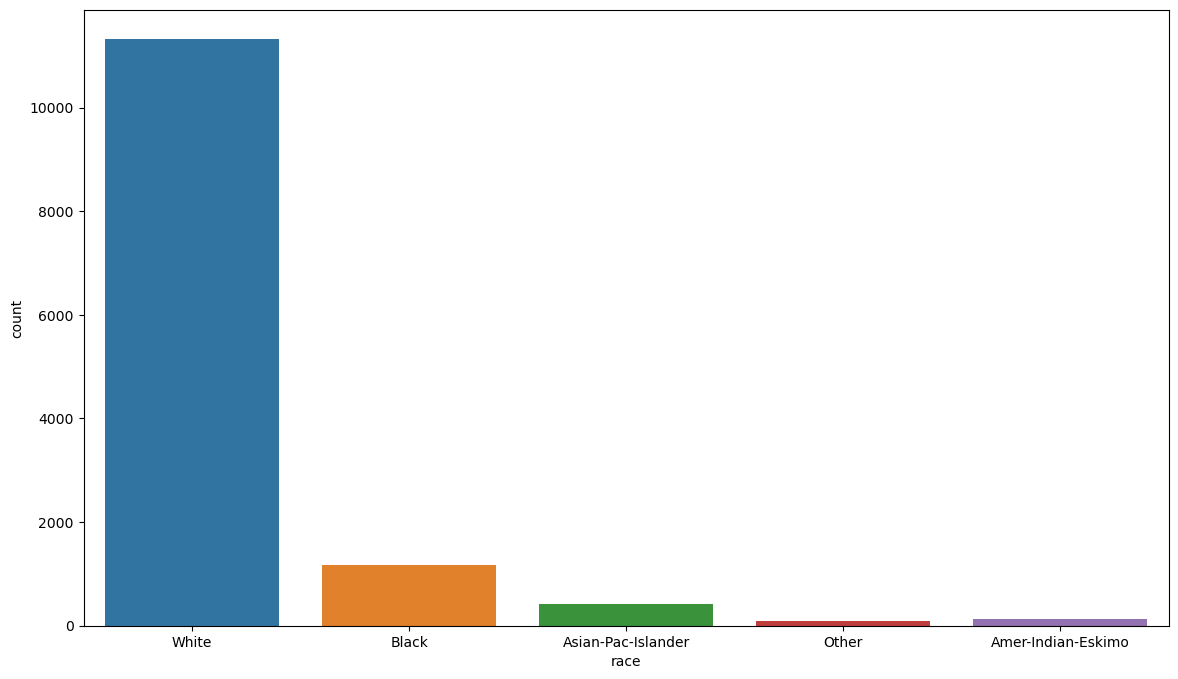

In [15]:
plt.figure(figsize=(14,8))
sns.countplot(data=df,x='race')
print(df['race'].value_counts())
plt.show()

here clearly it can be seen that white candidates very higher to any other race catogary

White                 11324
Black                  1180
Asian-Pac-Islander      411
Amer-Indian-Eskimo      124
Other                   100
Name: race, dtype: int64


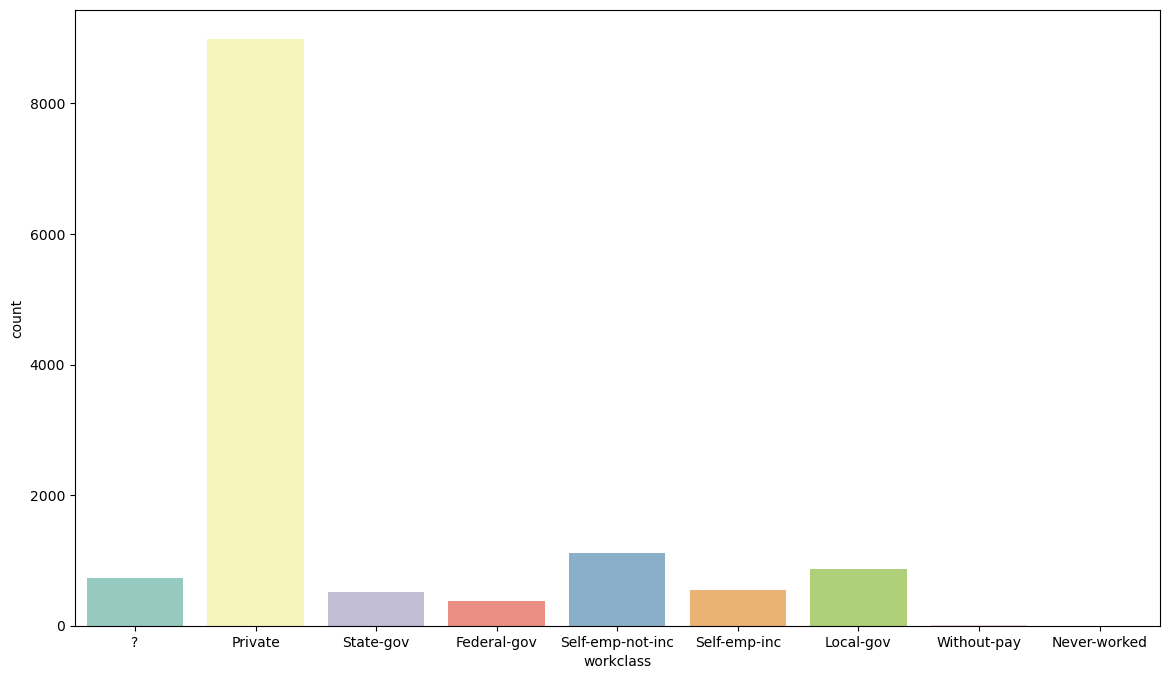

In [16]:
plt.figure(figsize=(14,8))
sns.countplot(data=df,x='workclass',palette='Set3')
print(df['race'].value_counts())
plt.show()

private employees are very higher in numbers than any other catagory

Husband           5783
Not-in-family     3252
Own-child         1776
Unmarried         1266
Wife               712
Other-relative     350
Name: relationship, dtype: int64


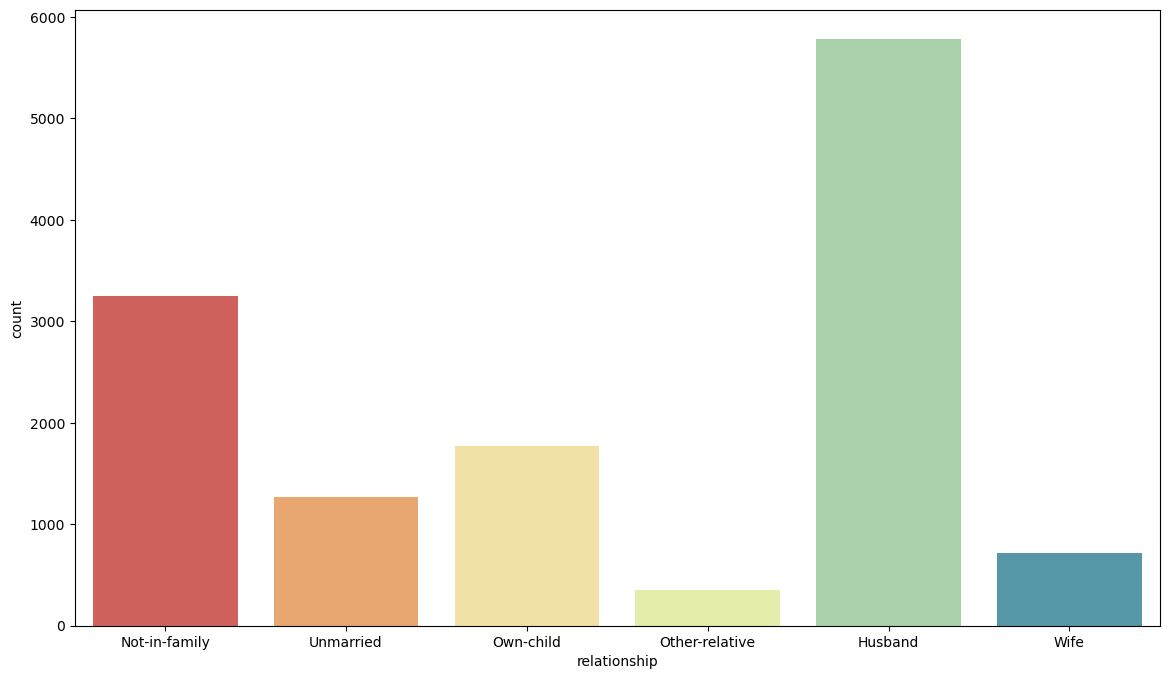

In [17]:
plt.figure(figsize=(14,8))
sns.countplot(data=df,x='relationship',palette='Spectral')
print(df['relationship'].value_counts())
plt.show()

no of husbands are much higher and single people are 2nd highest

Bivariate analysis

<Axes: xlabel='workclass', ylabel='age'>

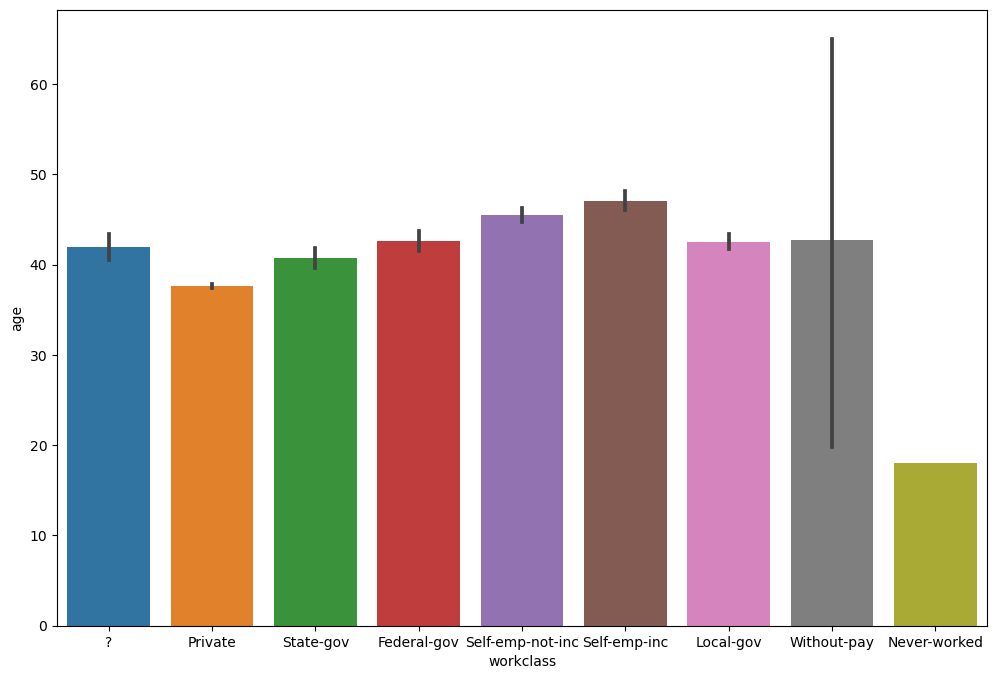

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(data=df,y='age',x='workclass')

#here we can see candidates ages with their workclass

<=50K    9008
>50K     4131
Name: income, dtype: int64


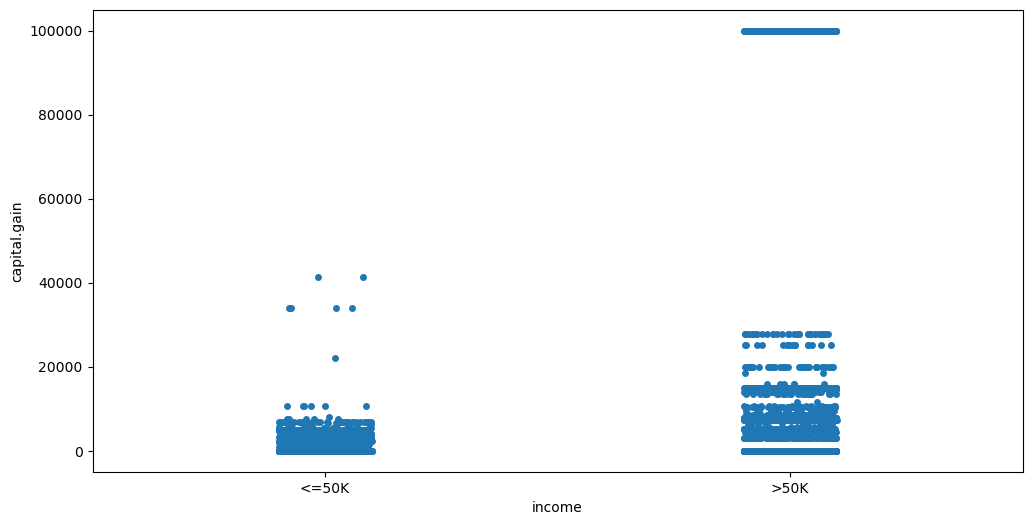

In [19]:
plt.figure(figsize=(12,6))
sns.stripplot(data=df,y='capital.gain',x='income')
print(df['income'].value_counts())

people having more than 50k income are higher

<=50K    9008
>50K     4131
Name: income, dtype: int64


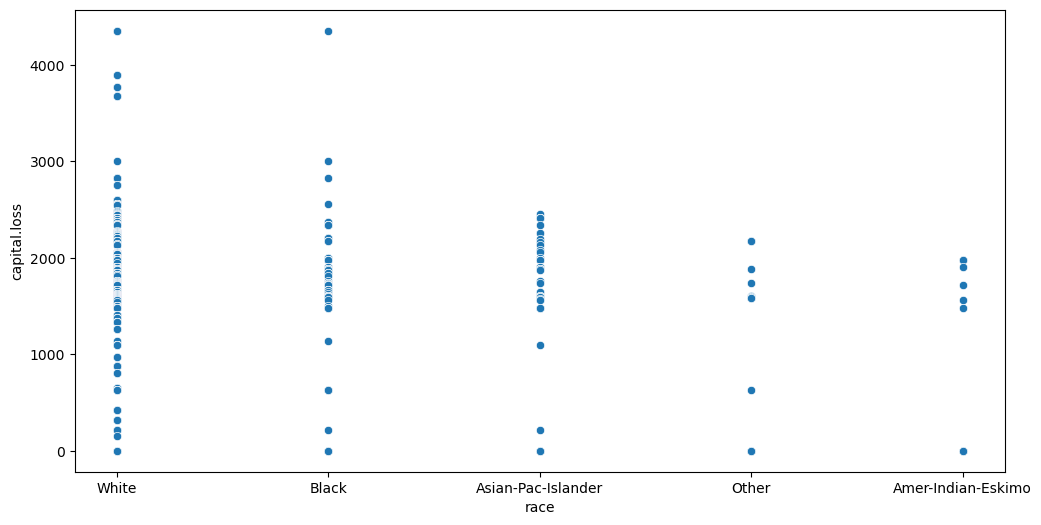

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,y='capital.loss',x='race')
print(df['income'].value_counts())

<=50K    9008
>50K     4131
Name: income, dtype: int64


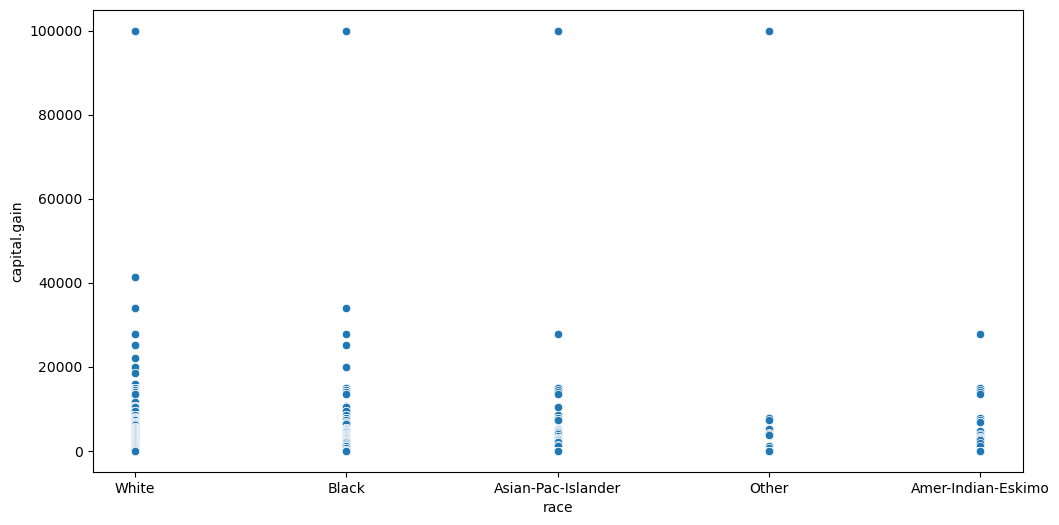

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,y='capital.gain',x='race')
print(df['income'].value_counts())

<Axes: xlabel='education', ylabel='capital.gain'>

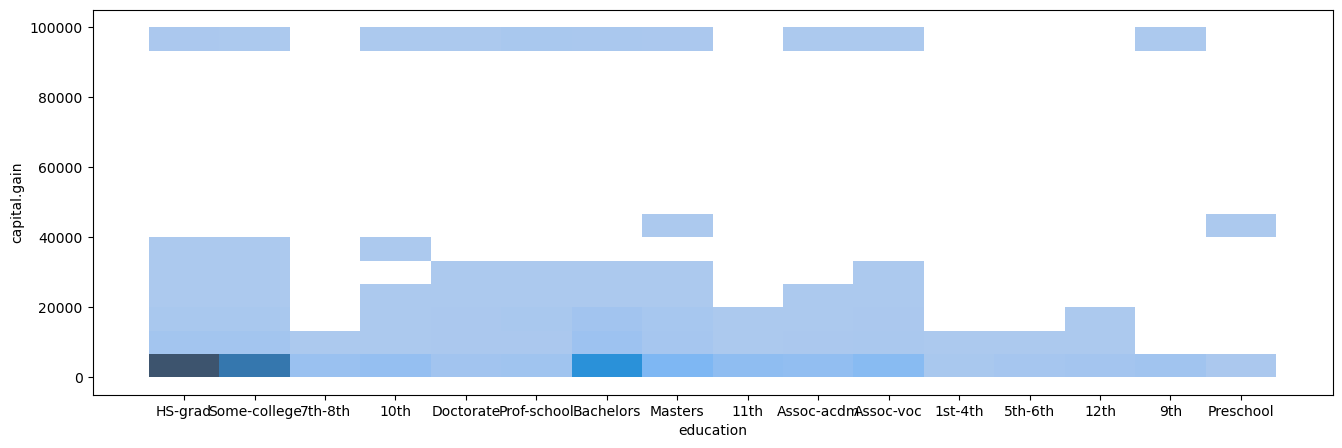

In [22]:
plt.figure(figsize=(16,5))
sns.histplot(data=df,x='education',y='capital.gain')

here we observed that people having higher education are gaining higher capital aswell

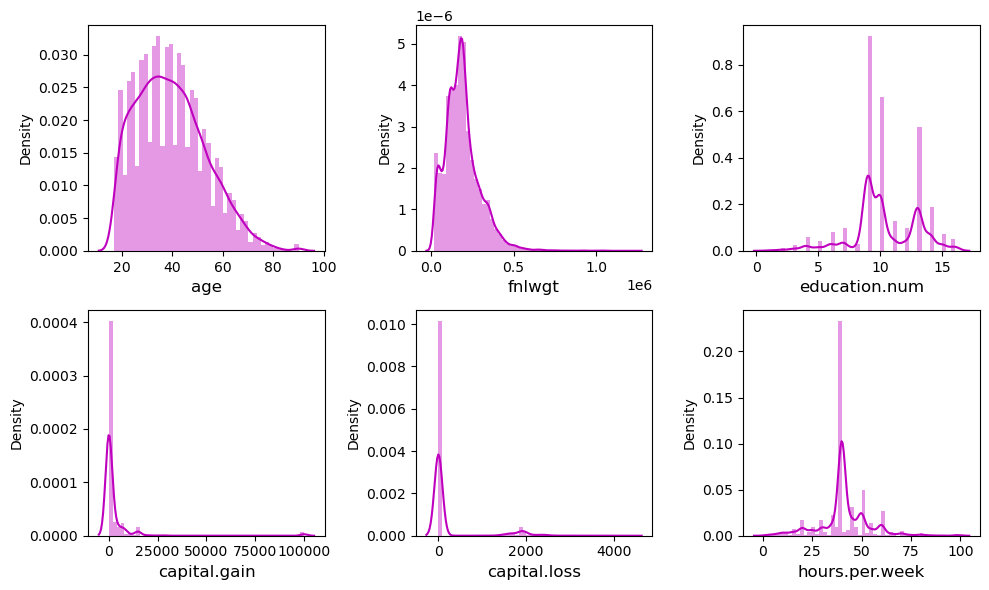

In [23]:
#  lets check how data is distributed in columns
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1

for col in Num_columns:
    if plotnumber<=6:
        ax=plt.subplot(2,3, plotnumber)
        sns.distplot(df[col], color="m")
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 10)
        
    plotnumber+=1
plt.tight_layout()

# Checking for skewnesss

In [24]:
df.skew()

age               0.515453
fnlwgt            1.379335
education.num    -0.288143
capital.gain      7.547961
capital.loss      2.613488
hours.per.week    0.207575
dtype: float64

In [25]:
cor=df.corr()
cor

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.070412,0.049952,0.108065,0.069737,0.054615
fnlwgt,-0.070412,1.000000,-0.044171,0.000471,-0.017111,-0.011139
education.num,0.049952,-0.044171,1.000000,0.175328,0.100789,0.160422
capital.gain,0.108065,0.000471,0.175328,1.000000,-0.082526,0.112339
capital.loss,0.069737,-0.017111,0.100789,-0.082526,1.000000,0.068508
hours.per.week,0.054615,-0.011139,0.160422,0.112339,0.068508,1.000000


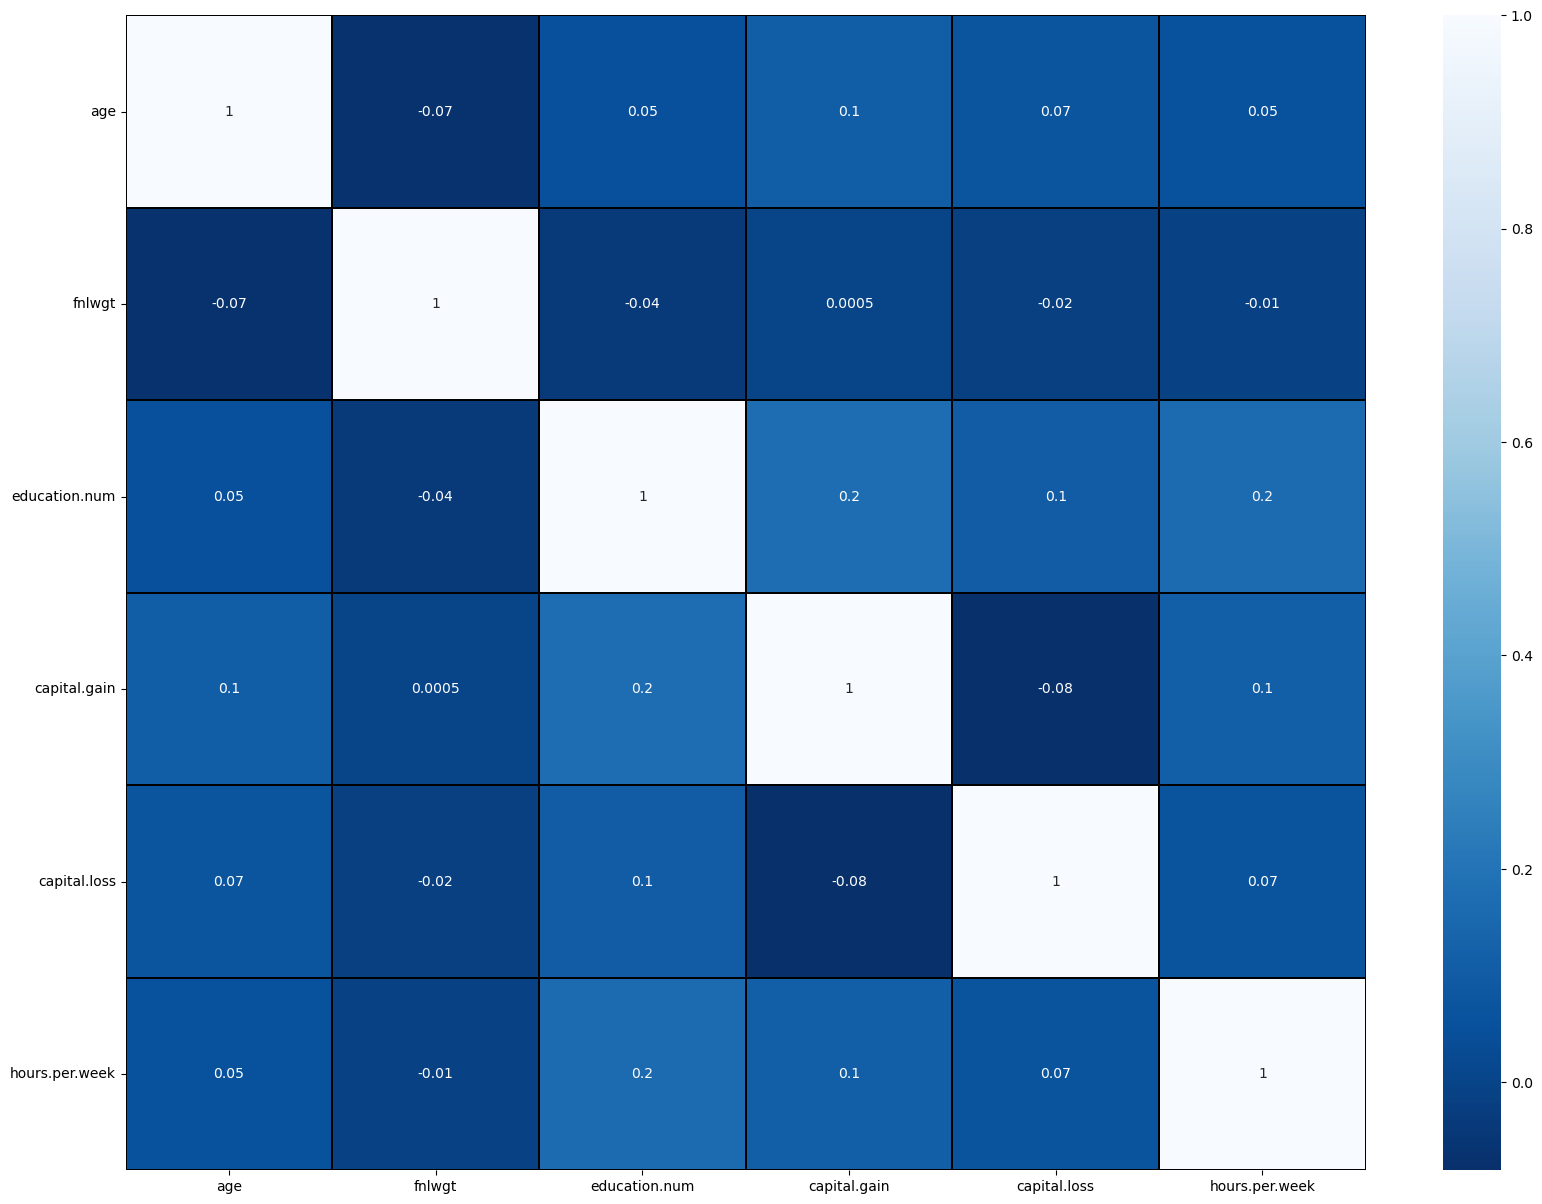

In [26]:
# visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt= ".1g", linecolor= "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0);
plt.show()

# Encoding catagorical_columns

In [27]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
        
df


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0.0,77053,11.0,9,6.0,0.0,1.0,4.0,0.0,0,4356,40,39.0,0.0
1,82,4.0,132870,11.0,9,6.0,4.0,1.0,4.0,0.0,0,4356,18,39.0,0.0
2,66,0.0,186061,15.0,10,6.0,0.0,4.0,2.0,0.0,0,4356,40,39.0,0.0
3,54,4.0,140359,5.0,4,0.0,7.0,4.0,4.0,0.0,0,3900,40,39.0,0.0
4,41,4.0,264663,15.0,10,5.0,10.0,3.0,4.0,0.0,0,3900,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13134,18,0.0,137363,15.0,10,4.0,0.0,3.0,4.0,0.0,0,0,30,39.0,0.0
13135,27,6.0,243569,11.0,9,2.0,12.0,0.0,4.0,1.0,0,0,40,39.0,0.0
13136,24,4.0,119156,11.0,9,4.0,6.0,3.0,4.0,1.0,0,0,40,39.0,0.0
13137,30,4.0,391114,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,60,39.0,0.0


In [28]:
df.skew()

age               0.515453
workclass        -0.747906
fnlwgt            1.379335
education        -0.958021
education.num    -0.288143
marital.status    0.089575
occupation        0.085280
relationship      0.913096
race             -2.530961
sex              -0.828700
capital.gain      7.547961
capital.loss      2.613488
hours.per.week    0.207575
native.country   -3.657129
income            0.799577
dtype: float64

In [29]:
cor=df.corr()
cor

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
age,1.000000,0.013584,-0.070412,-0.016180,0.049952,-0.246377,-0.028247,-0.258900,0.041425,0.098374,0.108065,0.069737,0.054615,-0.005319,0.250298
workclass,0.013584,1.000000,-0.017935,0.019125,0.062048,-0.074523,0.247185,-0.095545,0.043921,0.104765,0.050721,0.015051,0.139764,-0.012331,0.074512
fnlwgt,-0.070412,-0.017935,1.000000,-0.038095,-0.044171,0.037099,0.009692,0.009127,-0.024611,0.031771,0.000471,-0.017111,-0.011139,-0.048614,-0.011638
education,-0.016180,0.019125,-0.038095,1.000000,0.333835,-0.027792,-0.014824,-0.006231,0.019905,-0.026002,0.043105,0.018453,0.044976,0.058329,0.074408
education.num,0.049952,0.062048,-0.044171,0.333835,1.000000,-0.071619,0.123648,-0.104081,0.034010,0.027786,0.175328,0.100789,0.160422,0.037560,0.370055
marital.status,-0.246377,-0.074523,0.037099,-0.027792,-0.071619,1.000000,-0.023482,0.166818,-0.075253,-0.129960,-0.061070,-0.041885,-0.192195,-0.023592,-0.209125
occupation,-0.028247,0.247185,0.009692,-0.014824,0.123648,-0.023482,1.000000,-0.078942,0.002198,0.084395,0.035817,0.021925,0.093487,-0.017322,0.086520
relationship,-0.258900,-0.095545,0.009127,-0.006231,-0.104081,0.166818,-0.078942,1.000000,-0.111431,-0.598994,-0.080048,-0.080782,-0.258374,-0.003716,-0.260278
race,0.041425,0.043921,-0.024611,0.019905,0.034010,-0.075253,0.002198,-0.111431,1.000000,0.083473,0.013834,0.024854,0.037647,0.146991,0.076156
sex,0.098374,0.104765,0.031771,-0.026002,0.027786,-0.129960,0.084395,-0.598994,0.083473,1.000000,0.067784,0.058770,0.235646,-0.006949,0.226743


In [30]:
cor['income'].sort_values(ascending=False)

income            1.000000
education.num     0.370055
capital.gain      0.291994
age               0.250298
hours.per.week    0.248679
sex               0.226743
capital.loss      0.170172
occupation        0.086520
race              0.076156
workclass         0.074512
education         0.074408
native.country    0.012516
fnlwgt           -0.011638
marital.status   -0.209125
relationship     -0.260278
Name: income, dtype: float64

# Removing skewness

Note:- (1.) acceptable range for skewness is -0.5 to +0.5 
(2). for catagorical column and target variable we cant remove skewness

In [31]:
df['capital.gain']=np.cbrt(df['capital.gain'])

In [32]:
df['fnlwgt']=np.cbrt(df['fnlwgt'])

In [33]:
df['capital.loss']=np.cbrt(df['capital.loss'])

In [34]:
df.skew()

age               0.515453
workclass        -0.747906
fnlwgt           -0.164923
education        -0.958021
education.num    -0.288143
marital.status    0.089575
occupation        0.085280
relationship      0.913096
race             -2.530961
sex              -0.828700
capital.gain      2.280916
capital.loss      2.431180
hours.per.week    0.207575
native.country   -3.657129
income            0.799577
dtype: float64

# Checking for outliers

by ploting boxplot we can detect outliers

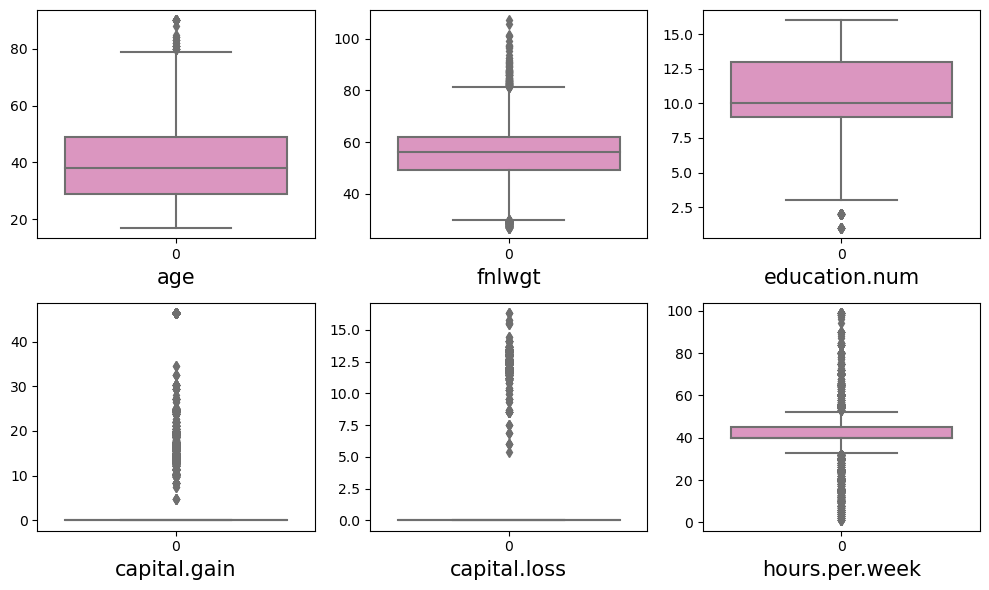

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1

for col in Num_columns:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[col],palette= "Set2_r")
        plt.xlabel(col, fontsize =15)
        plt.yticks(rotation=0,fontsize=10)
        
    plotnumber+=1
plt.tight_layout()


In [36]:
from scipy.stats import zscore
out_features=df[['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']]
z=np.abs(zscore(out_features))
z

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,3.701281,1.195112,0.494791,0.466269,3.793082,0.092686
1,3.114599,0.410834,0.494791,0.466269,3.793082,1.878203
2,1.941234,0.150035,0.110568,0.466269,3.793082,0.092686
3,1.061210,0.323732,2.415908,0.466269,3.642775,0.092686
4,0.107851,0.808492,0.110568,0.466269,3.642775,0.092686
...,...,...,...,...,...,...
13134,1.578861,0.358196,0.110568,0.466269,0.360404,0.904285
13135,0.918843,0.646256,0.494791,0.466269,0.360404,0.092686
13136,1.138849,0.579229,0.494791,0.466269,0.360404,0.092686
13137,0.698837,1.634553,0.494791,0.466269,0.360404,1.530511


In [37]:
np.where (z>3)

(array([    0,     0,     1,     1,     2,     3,     4,     5,     6,
            7,     8,     9,    10,    11,    12,    13,    14,    15,
           16,    17,    18,    19,    20,    21,    22,    23,    24,
           25,    26,    26,    27,    28,    29,    29,    30,    31,
           32,    33,    34,    35,    36,    37,    38,    39,    40,
           41,    42,    43,    44,    45,    46,    47,    48,    49,
           50,    51,    52,    53,    54,    55,    56,    57,    58,
           59,    60,    61,    62,    63,    64,    65,    66,    67,
           68,    69,    70,    71,    72,    73,    74,    75,    76,
           77,    78,    79,    80,    81,    81,    82,    83,    84,
           85,    86,    87,    88,    89,    90,    91,    92,    92,
           93,    94,    95,    96,    96,    97,    98,    98,    99,
          100,   101,   102,   103,   104,   105,   106,   106,   107,
          108,   109,   110,   111,   112,   113,   114,   115,   116,
      

In [38]:
# removing outliers and creating new dataframe
Df=df[(z<3).all(axis=1)]
Df.shape

(12496, 15)

# Featue scaling using StandardScaler

In [39]:
x=Df.drop("income",axis=1)
y=Df["income"]

In [40]:
from sklearn.preprocessing import  StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,2.250497,0.080426,0.545648,-0.380341,1.087923,2.348699,0.785089,-0.236084,0.382325,0.675330,-0.47989,3.169495,-0.06179,0.284273
1,2.024916,-1.301022,-2.091288,0.154817,-0.517401,-0.374506,-0.861753,-0.853647,0.382325,0.675330,-0.47989,3.161778,-0.06179,0.284273
2,2.250497,0.080426,-0.505871,-1.718235,-2.925388,-0.374506,0.079300,-0.853647,0.382325,0.675330,-0.47989,3.161778,-0.06179,0.284273
3,1.197785,-1.301022,0.063490,0.422396,1.489254,-0.374506,0.785089,2.234170,0.382325,-1.480757,-0.47989,3.161778,-0.06179,0.284273
4,1.348173,-1.991746,1.549412,0.154817,-0.517401,0.987097,-1.332280,-0.236084,0.382325,0.675330,-0.47989,3.157131,-0.06179,0.284273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12491,-1.584380,-2.682470,-0.354839,1.225133,-0.116070,0.987097,-1.567543,0.999043,0.382325,-1.480757,-0.47989,-0.344989,-0.96624,0.284273
12492,-0.907637,1.461874,0.665810,0.154817,-0.517401,-0.374506,1.255616,-0.853647,0.382325,0.675330,-0.47989,-0.344989,-0.06179,0.284273
12493,-1.133218,0.080426,-0.579435,0.154817,-0.517401,0.987097,-0.155964,0.999043,0.382325,0.675330,-0.47989,-0.344989,-0.06179,0.284273
12494,-0.682056,0.080426,1.670043,0.154817,-0.517401,-0.374506,-0.155964,-0.853647,0.382325,0.675330,-0.47989,-0.344989,1.74711,0.284273


# checking for vif value 

In [41]:
# finding vif in each scaled column x.shape[1]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.183126,age
1,1.080682,workclass
2,1.010803,fnlwgt
3,1.122458,education
4,1.212354,education.num
5,1.126005,marital.status
6,1.082599,occupation
7,1.718280,relationship
8,1.039266,race
9,1.597818,sex


Vif values should be between 1 to 10 , as our all values are under limits hence need no further operation

# Finding best random_state

In [53]:
# importing necessary libraries:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression



In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 1)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred= RFR.predict(x_test)
    acc= accuracy_score(y_test,pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS = i
        
print("best accuracy is ", maxAccu*100, "at random_state", maxRS)

best accuracy is  87.2499333155508 at random_state 41


In [56]:
from sklearn.ensemble import AdaBoostClassifier

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = i)
    ad = AdaBoostClassifier()
    ad.fit(x_train, y_train)
    pred= ad.predict(x_test)
    acc= accuracy_score(y_test,pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS = i
        
print("best accuracy is ", maxAccu*100,'%', "at random_state", maxRS)

best accuracy is  88.10349426513737 % at random_state 78


In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = i)
    GB = GradientBoostingClassifier()
    GB.fit(x_train, y_train)
    pred= GB.predict(x_test)
    acc= accuracy_score(y_test,pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS = i
        
print("best accuracy is ", maxAccu, "at random_state", maxRS)

best accuracy is  0.8927714057081888 at random_state 70


In [61]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = i)
    svc = SVC()
    GB.fit(x_train, y_train)
    pred= GB.predict(x_test)
    acc= accuracy_score(y_test,pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS = i
        
print("best accuracy is ", maxAccu*100, "at random_state", maxRS)

best accuracy is  89.2504667911443 at random_state 70


Note: here different accuracies we have found at different random_states but max accuracy is 89% at 70 

In [63]:
# checking accuracy for support vector machine classifier
svc=SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))


0.8452920778874367


# Model Building

In [68]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 70)

In [65]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [66]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge

In [69]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR= LR.predict(x_test)
pred_train=LR.predict(x_train)
print(LR)
print('r2_score:',r2_score(y_test,pred_LR)*100)
print('r2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_LR))
print('Mean squared error:',mean_squared_error(y_test,pred_LR))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred_LR)))

LinearRegression()
r2_score: 36.5894931283782
r2_score on training data: 34.387404238726695
Mean absolute error: 0.2902187301590768
Mean squared error: 0.13270674453995907
Root Mean squared error: 0.364289369238191


In [74]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr= rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print(rfr)
print('r2_score:',r2_score(y_test,pred_rfr)*100)
print('r2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_rfr))
print('Mean squared error:',mean_squared_error(y_test,pred_rfr))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred_rfr)))

RandomForestRegressor()
r2_score: 57.939595945276125
r2_score on training data: 93.94245420553418
Mean absolute error: 0.16701787143238198
Mean squared error: 0.08802483328887703
Root Mean squared error: 0.29668979303116755


In [71]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd= rd.predict(x_test)
pred_train=rd.predict(x_train)
print(rd)
print('r2_score:',r2_score(y_test,pred_rd)*100)
print('r2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_rd))
print('Mean squared error:',mean_squared_error(y_test,pred_rd))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

Ridge()
r2_score: 36.58947085006821
r2_score on training data: 34.38740397651634
Mean absolute error: 0.29022359891889377
Mean squared error: 0.13270679116444037
Root Mean squared error: 0.3642894332319294


In [72]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
pred_dtc= dtc.predict(x_test)
pred_train=dtc.predict(x_train)
print(dtc)
print('r2_score:',r2_score(y_test,pred_dtc)*100)
print('r2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_dtc))
print('Mean squared error:',mean_squared_error(y_test,pred_dtc))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred_dtc)))

DecisionTreeRegressor()
r2_score: 23.40026612652637
r2_score on training data: 100.0
Mean absolute error: 0.16030941584422512
Mean squared error: 0.16030941584422512
Root Mean squared error: 0.4003865829972642


In [73]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn= knn.predict(x_test)
pred_train=knn.predict(x_train)
print(knn)
print('r2_score:',r2_score(y_test,pred_knn)*100)
print('r2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('Mean squared error:',mean_squared_error(y_test,pred_knn))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

KNeighborsRegressor()
r2_score: 38.93943343743137
r2_score on training data: 57.68331856443878
Mean absolute error: 0.22112563350226727
Mean squared error: 0.12778874366497733
Root Mean squared error: 0.3574755147768548


Note : we are best r2 score with random forest classifier

In [78]:
Model=RandomForestClassifier()

In [79]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print('r2_score:',r2_score(y_test,pred))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

r2_score: 0.42773243745108724
Mean absolute error: 0.1197652707388637
Mean squared error: 0.1197652707388637
Root Mean squared error: 0.3460711931653135


# Using dump method (pickle lib.) for serializing our model

In [85]:
import pickle
filename='census.pkl'
pickle.dump(Model,open(filename,'wb')) # saved model

# for deserializing we are using load method

In [86]:
import pickle

loaded_model=pickle.load(open('census.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

36.58940734734367


In [87]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3739,3740,3741,3742,3743,3744,3745,3746,3747,3748
Predicted,0.166844,0.375973,0.070788,0.592004,0.452838,0.525259,0.354521,0.420652,0.166488,0.806326,...,0.291814,0.328394,0.413908,0.994703,0.077351,0.515673,0.521213,0.478616,0.658359,0.050374
Original,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
